## 03. PyTorch Computer Vision

Resource coursebook: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can levarage for your own problems
* `torchvision.transforms` - function for manipulating your vision data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - create a Python iterable over a datasets

In [14]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.7.1
0.22.1


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from `torchvision.datasets`

In [15]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training dataset
    download=True, # do we want to download it
    transform=ToTensor(), # how do we want to transform teh data
    target_transform=None, # how do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [16]:
len(train_data), len(test_data)

(60000, 10000)

In [17]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [18]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_to_dix = train_data.class_to_idx
class_to_dix

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [20]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [21]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {label}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 9


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


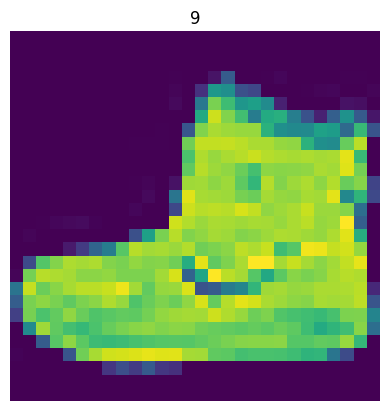

In [32]:
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.title(label)
plt.imshow(image.squeeze())
plt.axis(False)
plt.show()

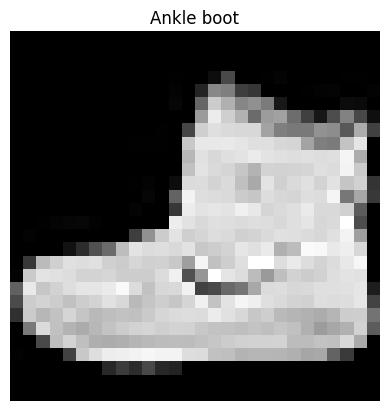

In [31]:
plt.title(class_names[label])
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.show()

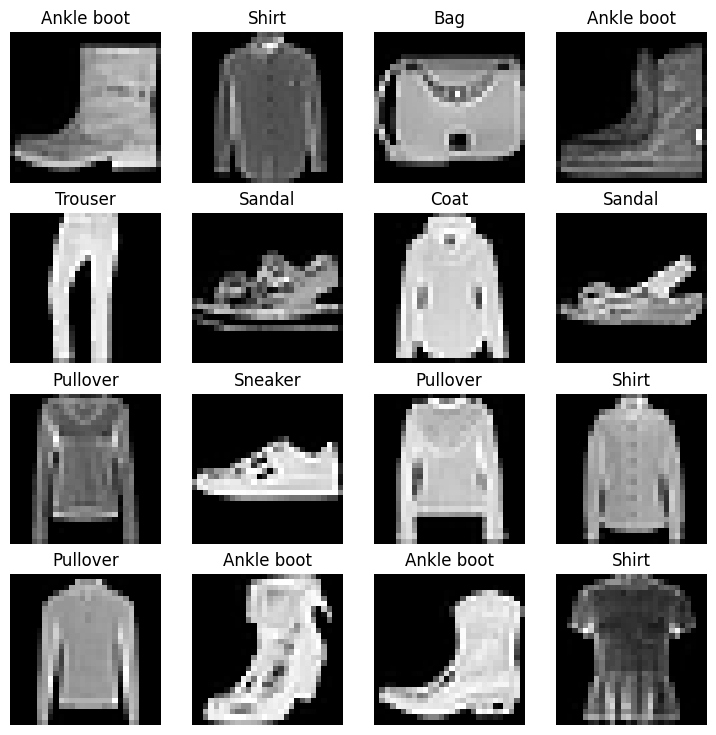

In [39]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    
    img, label = train_data[random_idx]
    
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or you think we'll need non-linearity?

## 2. Prepare dataloader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in your computer hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch

In [42]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_data_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_data_loader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [56]:
# Let's check out what we've created
print(f"DataLoaders: {train_data_loader, test_data_loader}")
print(f"Length of train_data_loader: {len(train_data_loader)} batches of {BATCH_SIZE}...")
print(f"Length of test_data_loader: {len(test_data_loader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x156e520d0>, <torch.utils.data.dataloader.DataLoader object at 0x15490b360>)
Length of train_data_loader: 1875 batches of 32...
Length of test_data_loader: 313 batches of 32...


In [60]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

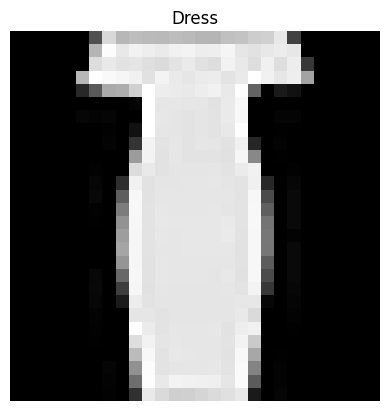

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Create a baseline model

When starting to build a series of machine learning experiments, it's best practice to start with a baseline model

A baselin model is a simple model you will try and improve upon with subsequent  models/experiments

In other words: start simply and add complexity when necessary

In [67]:
# Create a flatten layer
flatte_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f"shape before flattening: {x.shape} -> [color_channels, height, width]")

# Flatten the sample
output = flatte_model(x) # perform forward pass

# Print out what happend
print(f"shape after flattening: {output.shape} -> [color_channels, height * width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [68]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.3529, 0.8235, 0.6392, 0.8588, 0.8353, 0.7490,
        0.7098, 0.6902, 0.6902, 0.6902, 0.6745, 0.6471, 0.6510, 0.6471, 0.6431,
        0.6157, 0.6392, 0.5804, 0.7216, 0.6784, 0.6471, 0.5647, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.7686, 0.5059, 0.0000, 0.1569, 0.9882,
        0.8980, 0.8667, 0.8784, 0.8745, 0.8706, 0.9098, 0.9255, 0.9216, 0.8745,
        0.8706, 0.8745, 0.8667, 0.9098, 0.9569, 0.2000, 0.2000, 0.7961, 0.4902,
        0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.6706, 0.0039, 0.0000, 0.0000,
        0.6000, 0.8667, 0.8392, 0.8627, 0.8627, 0.8667, 0.8627, 0.8510, 0.8549,
        0.8510, 0.8510, 0.8510, 0.8353, 0.8431, 0.3137, 0.0039, 0.0000, 0.3569,
        0.5529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7137, 0.3765, 0.3333,
        0.6784, 0.6549, 0.5804, 0.6902, 0.7333, 0.7529, 0.7843, 0.8078, 0.8314,
        0.8157, 0.8000, 0.7882, 0.7373, 0.6667, 0.7020, 0.6118, 0.4510, 0.0000,
        0.6627, 0.6157, 0.0000, 0.0000, 

In [74]:
from math import inf
from pandas import infer_freq
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [75]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28 * 28
    hidden_units=32,
    output_shape=len(class_names) # one for every class
).to("cpu")

In [76]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [77]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[ 0.0461, -0.1040,  0.2095,  0.0458, -0.0841, -0.3552,  0.0832, -0.1319,
          0.1477,  0.0418]], grad_fn=<AddmmBackward0>)

In [78]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0023,  0.0071,  0.0330,  ...,  0.0164, -0.0095, -0.0053],
                      [ 0.0167, -0.0324,  0.0086,  ..., -0.0090,  0.0203, -0.0100],
                      [-0.0118,  0.0119, -0.0080,  ..., -0.0193,  0.0170,  0.0246]])),
             ('layer_stack.1.bias',
              tensor([ 0.0161, -0.0159,  0.0234,  0.0084, -0.0339, -0.0047, -0.0323, -0.0125,
                       0.0065, -0.0339, -0.0036,  0.0208,  0.0018,  0.0308, -0.0056, -0.0006,
                      -0.0294, -0.0100,  0.0059,  0.0271,  0.0328, -0.0049,  0.0312,  0.0041,
                       0.0242,  0.0212, -0.0234,  0.0345,  0.0085, -0.0198, -0.0343,  0.0012])),
             

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss functionwill be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem let's use accuracy as our evaluation problem

In [79]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).item() # torch.eq() calculates when two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [80]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1,
)

In [81]:
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [84]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [87]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.320900239283219e-05